In [1]:
pwd()
using Pkg; Pkg.activate("../../../FermiCG/")
using FermiCG, NPZ, JLD2
using Plots
using PyCall
using Printf

readdir()

  Activating environment at `~/code/FermiCG/Project.toml`


2-element Vector{String}:
 ".ipynb_checkpoints"
 "Untitled.ipynb"

In [2]:
molecule = "
He         0.00000        0.00000       -5.93406
He         0.00000        0.00000       -4.23728
He         0.00000        0.00000       -2.54161
He         0.00000        0.00000       -0.84720
He         0.00000        0.00000        0.84720
He         0.00000        0.00000        2.54161
He         0.00000        0.00000        4.23728
He         0.00000        0.00000        5.93406
"
atoms = []
for (li,line) in enumerate(split(rstrip(lstrip(molecule)), "\n"))
    l = split(line)
    push!(atoms, Atom(li, l[1], parse.(Float64,l[2:4])))
end

basis = "aug-cc-pvdz"
# 
# Create FermiCG.Molecule type
mol     = Molecule(0, 1, atoms,basis);


pyscf = pyimport("pyscf")
# pyscf.lib.num_threads(1)


pymol = pyscf.gto.Mole(atom=molecule,
    symmetry = false, spin =0,charge=0,
    basis = basis)

pymol.build()
mf = pyscf.scf.RHF(pymol)
mf.verbose = 4
mf.conv_tol = 1e-8
mf.conv_tol_grad = 1e-5
mf.run(max_cycle=200)

rdm_mf = mf.make_rdm1()

@printf(" Hartree-Fock Energy: %12.8f", mf.e_tot)
pyscfcc = pyimport("pyscf.cc")

mycc = pyscfcc.CCSD(mf).run()
@printf("CCSD total energy    %12.8f\n", mycc.e_tot)
et = mycc.ccsd_t()
@printf("CCSD(T) total energy %12.8f\n", mycc.e_tot + et)




******** <class 'pyscf.scf.hf.RHF'> ********
method = RHF
initial guess = minao
damping factor = 0
level_shift factor = 0
DIIS = <class 'pyscf.scf.diis.CDIIS'>
diis_start_cycle = 1
diis_space = 8
SCF conv_tol = 1e-08
SCF conv_tol_grad = 1e-05
SCF max_cycles = 200
direct_scf = True
direct_scf_tol = 1e-13
chkfile to save SCF result = /var/folders/td/qpnnxwv93pq0t7bbdkh5rvzr0000gn/T/tmpn3sjajwr
max_memory 4000 MB (current use 0 MB)
init E= -22.943000186084
  HOMO = -0.770543621240128  LUMO = 0.176751045653485
cycle= 1 E= -22.7850411286304  delta_E= 0.158  |g|= 0.0315  |ddm|= 0.486
  HOMO = -0.822010829311973  LUMO = 0.177606115211847
cycle= 2 E= -22.7853262237825  delta_E= -0.000285  |g|= 0.00562  |ddm|= 0.0361
  HOMO = -0.82220883696828  LUMO = 0.177630402512267
cycle= 3 E= -22.7853371328896  delta_E= -1.09e-05  |g|= 0.000194  |ddm|= 0.00841
  HOMO = -0.822152165256211  LUMO = 0.177632572193959
cycle= 4 E= -22.7853371484081  delta_E= -1.55e-08  |g|= 2.32e-05  |ddm|= 0.000317
  HOMO = -

    8

    He       0.0000000000000000       0.0000000000000000      -6.2307629999999996 
    He       0.0000000000000000       0.0000000000000000      -4.4491440000000004 
    He       0.0000000000000000       0.0000000000000000      -2.6686904999999999 
    He       0.0000000000000000       0.0000000000000000      -0.8895600000000000 
    He       0.0000000000000000       0.0000000000000000       0.8895600000000000 
    He       0.0000000000000000       0.0000000000000000       2.6686904999999999 
    He       0.0000000000000000       0.0000000000000000       4.4491440000000004 
    He       0.0000000000000000       0.0000000000000000       6.2307629999999996 



******** <class 'pyscf.scf.hf.RHF'> ********
method = RHF
initial guess = minao
damping factor = 0
level_shift factor = 0
DIIS = <class 'pyscf.scf.diis.CDIIS'>
diis_start_cycle = 1
diis_space = 8
SCF conv_tol = 1e-08
SCF conv_tol_grad = 1e-08
SCF max_cycles = 200
direct_scf = True
direct_scf_tol = 1e-13
chkfile to save SCF r

 Hartree-Fock Energy: -22.83224194E(CCSD) = -23.10492576138519  E_corr = -0.2726838189762873
CCSD total energy    -23.10492576
CCSD(T) correction = -0.000148737342549432
CCSD(T) total energy -23.10507450
    8

    He       0.0000000000000000       0.0000000000000000      -7.4175749999999994 
    He       0.0000000000000000       0.0000000000000000      -5.2965999999999998 
    He       0.0000000000000000       0.0000000000000000      -3.1770125000000000 
    He       0.0000000000000000       0.0000000000000000      -1.0589999999999999 
    He       0.0000000000000000       0.0000000000000000       1.0589999999999999 
    He       0.0000000000000000       0.0000000000000000       3.1770125000000000 
    He       0.0000000000000000       0.0000000000000000       5.2965999999999998 
    He       0.0000000000000000       0.0000000000000000       7.4175749999999994 



******** <class 'pyscf.scf.hf.RHF'> ********
method = RHF
initial guess = minao
damping factor = 0
level_shift factor = 0


 Hartree-Fock Energy: -22.84274083E(CCSD) = -23.11458197941317  E_corr = -0.27184115119625
CCSD total energy    -23.11458198
CCSD(T) correction = -7.16495434855242e-05
CCSD(T) total energy -23.11465363
    8

    He       0.0000000000000000       0.0000000000000000      -8.6043869999999991 
    He       0.0000000000000000       0.0000000000000000      -6.1440560000000000 
    He       0.0000000000000000       0.0000000000000000      -3.6853344999999997 
    He       0.0000000000000000       0.0000000000000000      -1.2284400000000000 
    He       0.0000000000000000       0.0000000000000000       1.2284400000000000 
    He       0.0000000000000000       0.0000000000000000       3.6853344999999997 
    He       0.0000000000000000       0.0000000000000000       6.1440560000000000 
    He       0.0000000000000000       0.0000000000000000       8.6043869999999991 



******** <class 'pyscf.scf.hf.RHF'> ********
method = RHF
initial guess = minao
damping factor = 0
level_shift factor = 0
DI

 Hartree-Fock Energy: -22.84511019E(CCSD) = -23.11646584581151  E_corr = -0.2713556533112849
CCSD total energy    -23.11646585
CCSD(T) correction = -3.4068790538471e-05
CCSD(T) total energy -23.11649991
    8

    He       0.0000000000000000       0.0000000000000000      -9.7911989999999989 
    He       0.0000000000000000       0.0000000000000000      -6.9915120000000002 
    He       0.0000000000000000       0.0000000000000000      -4.1936564999999995 
    He       0.0000000000000000       0.0000000000000000      -1.3978799999999998 
    He       0.0000000000000000       0.0000000000000000       1.3978799999999998 
    He       0.0000000000000000       0.0000000000000000       4.1936564999999995 
    He       0.0000000000000000       0.0000000000000000       6.9915120000000002 
    He       0.0000000000000000       0.0000000000000000       9.7911989999999989 



******** <class 'pyscf.scf.hf.RHF'> ********
method = RHF
initial guess = minao
damping factor = 0
level_shift factor = 0
D

 Hartree-Fock Energy: -22.84559695E(CCSD) = -23.11667978050545  E_corr = -0.271082832357045
CCSD total energy    -23.11667978
CCSD(T) correction = -1.67452634987741e-05
CCSD(T) total energy -23.11669653
    8

    He       0.0000000000000000       0.0000000000000000     -10.9780110000000004 
    He       0.0000000000000000       0.0000000000000000      -7.8389680000000004 
    He       0.0000000000000000       0.0000000000000000      -4.7019785000000001 
    He       0.0000000000000000       0.0000000000000000      -1.5673200000000000 
    He       0.0000000000000000       0.0000000000000000       1.5673200000000000 
    He       0.0000000000000000       0.0000000000000000       4.7019785000000001 
    He       0.0000000000000000       0.0000000000000000       7.8389680000000004 
    He       0.0000000000000000       0.0000000000000000      10.9780110000000004 



******** <class 'pyscf.scf.hf.RHF'> ********
method = RHF
initial guess = minao
damping factor = 0
level_shift factor = 0
D

 Hartree-Fock Energy: -22.84564962E(CCSD) = -23.11658790452063  E_corr = -0.2709382844603207
CCSD total energy    -23.11658790
CCSD(T) correction = -8.73007592115908e-06
CCSD(T) total energy -23.11659663
    8

    He       0.0000000000000000       0.0000000000000000     -12.1648229999999984 
    He       0.0000000000000000       0.0000000000000000      -8.6864239999999988 
    He       0.0000000000000000       0.0000000000000000      -5.2103004999999998 
    He       0.0000000000000000       0.0000000000000000      -1.7367599999999999 
    He       0.0000000000000000       0.0000000000000000       1.7367599999999999 
    He       0.0000000000000000       0.0000000000000000       5.2103004999999998 
    He       0.0000000000000000       0.0000000000000000       8.6864239999999988 
    He       0.0000000000000000       0.0000000000000000      12.1648229999999984 



******** <class 'pyscf.scf.hf.RHF'> ********
method = RHF
initial guess = minao
damping factor = 0
level_shift factor = 0


 Hartree-Fock Energy: -22.84564397E(CCSD) = -23.11650474718264  E_corr = -0.2708607786516415
CCSD total energy    -23.11650475
CCSD(T) correction = -4.84715899119148e-06
CCSD(T) total energy -23.11650959
    8

    He       0.0000000000000000       0.0000000000000000     -13.3516349999999999 
    He       0.0000000000000000       0.0000000000000000      -9.5338799999999999 
    He       0.0000000000000000       0.0000000000000000      -5.7186224999999995 
    He       0.0000000000000000       0.0000000000000000      -1.9061999999999999 
    He       0.0000000000000000       0.0000000000000000       1.9061999999999999 
    He       0.0000000000000000       0.0000000000000000       5.7186224999999995 
    He       0.0000000000000000       0.0000000000000000       9.5338799999999999 
    He       0.0000000000000000       0.0000000000000000      13.3516349999999999 



******** <class 'pyscf.scf.hf.RHF'> ********
method = RHF
initial guess = minao
damping factor = 0
level_shift factor = 0


 Hartree-Fock Energy: -22.84564040E(CCSD) = -23.11645684890626  E_corr = -0.2708164444112386
CCSD total energy    -23.11645685
CCSD(T) correction = -2.84545070591564e-06
CCSD(T) total energy -23.11645969
    8

    He       0.0000000000000000       0.0000000000000000     -14.5384469999999997 
    He       0.0000000000000000       0.0000000000000000     -10.3813360000000010 
    He       0.0000000000000000       0.0000000000000000      -6.2269445000000001 
    He       0.0000000000000000       0.0000000000000000      -2.0756399999999999 
    He       0.0000000000000000       0.0000000000000000       2.0756399999999999 
    He       0.0000000000000000       0.0000000000000000       6.2269445000000001 
    He       0.0000000000000000       0.0000000000000000      10.3813360000000010 
    He       0.0000000000000000       0.0000000000000000      14.5384469999999997 



******** <class 'pyscf.scf.hf.RHF'> ********
method = RHF
initial guess = minao
damping factor = 0
level_shift factor = 0


 Hartree-Fock Energy: -22.84563872E(CCSD) = -23.11642895204383  E_corr = -0.2707902270942266
CCSD total energy    -23.11642895
CCSD(T) correction = -1.74928643716523e-06
CCSD(T) total energy -23.11643070
    8

    He       0.0000000000000000       0.0000000000000000     -15.7252590000000012 
    He       0.0000000000000000       0.0000000000000000     -11.2287920000000021 
    He       0.0000000000000000       0.0000000000000000      -6.7352665000000007 
    He       0.0000000000000000       0.0000000000000000      -2.2450800000000002 
    He       0.0000000000000000       0.0000000000000000       2.2450800000000002 
    He       0.0000000000000000       0.0000000000000000       6.7352665000000007 
    He       0.0000000000000000       0.0000000000000000      11.2287920000000021 
    He       0.0000000000000000       0.0000000000000000      15.7252590000000012 



******** <class 'pyscf.scf.hf.RHF'> ********
method = RHF
initial guess = minao
damping factor = 0
level_shift factor = 0


 Hartree-Fock Energy: -22.84563789E(CCSD) = -23.11641261093894  E_corr = -0.2707747161100995
CCSD total energy    -23.11641261
CCSD(T) correction = -1.11724612040823e-06
CCSD(T) total energy -23.11641373
    8

    He       0.0000000000000000       0.0000000000000000     -16.9120710000000010 
    He       0.0000000000000000       0.0000000000000000     -12.0762480000000014 
    He       0.0000000000000000       0.0000000000000000      -7.2435885000000004 
    He       0.0000000000000000       0.0000000000000000      -2.4145200000000000 
    He       0.0000000000000000       0.0000000000000000       2.4145200000000000 
    He       0.0000000000000000       0.0000000000000000       7.2435885000000004 
    He       0.0000000000000000       0.0000000000000000      12.0762480000000014 
    He       0.0000000000000000       0.0000000000000000      16.9120710000000010 



******** <class 'pyscf.scf.hf.RHF'> ********
method = RHF
initial guess = minao
damping factor = 0
level_shift factor = 0


 Hartree-Fock Energy: -22.84563762E(CCSD) = -23.11640317795976  E_corr = -0.270765554726125
CCSD total energy    -23.11640318
CCSD(T) correction = -7.36890917527462e-07
CCSD(T) total energy -23.11640391


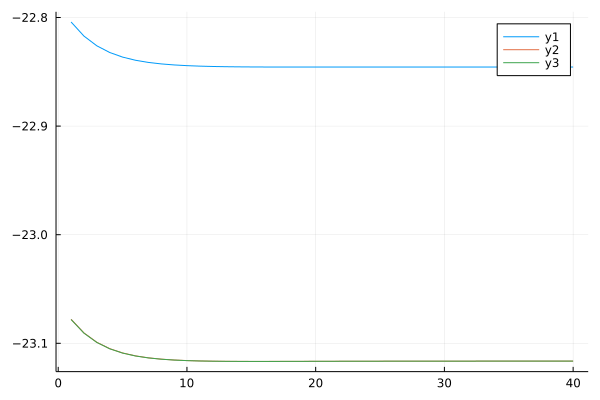

In [3]:
n_steps = 40
step_size = .05

pymol_init = pyscf.gto.Mole(atom=molecule,
    symmetry = false, spin =0,charge=0,
    basis = basis)
pymol.build()


io = open("traj.xyz", "w");
energies_scf = []
energies_ccsd = []
energies_ccsdt = []

for R in 1:n_steps

    pymol = deepcopy(pymol_init)
    scale = 1+R*step_size

    xyz = @sprintf("%5i\n\n", length(mol.atoms))
    tmp = []
    for a in mol.atoms
        push!(tmp, ["He", (a.xyz[1]*scale, a.xyz[2]*scale, a.xyz[3]*scale)])
        xyz = xyz * @sprintf("%6s %24.16f %24.16f %24.16f \n", a.symbol, a.xyz[1]*scale, a.xyz[2]*scale, a.xyz[3]*scale)
    end
    pymol.atom = tmp
    pymol.build()
    
    
    println(xyz)
    write(io, xyz);
   
    
#     println(pymol.format_atom(1))
    
    #     mol_R = Molecule(0, 1, [a[0]pymol.atom, pymol.basis)


    mf = pyscf.scf.RHF(pymol)
    mf.verbose = 4
    mf.conv_tol = 1e-8
    mf.conv_tol_grad = 1e-8
    mf.run(max_cycle=200)

    rdm_mf = mf.make_rdm1()
    @printf(" Hartree-Fock Energy: %12.8f", mf.e_tot)

    push!(energies_scf, mf.e_tot)
    
    pyscfcc = pyimport("pyscf.cc")

    mycc = pyscfcc.CCSD(mf).run()
    @printf("CCSD total energy    %12.8f\n", mycc.e_tot)
    
    et = mycc.ccsd_t()
    @printf("CCSD(T) total energy %12.8f\n", mycc.e_tot + et)

    
    push!(energies_ccsd, mycc.e_tot)
    push!(energies_ccsdt, mycc.e_tot+et)

end
close(io);
plot([energies_scf, energies_ccsd, energies_ccsdt])

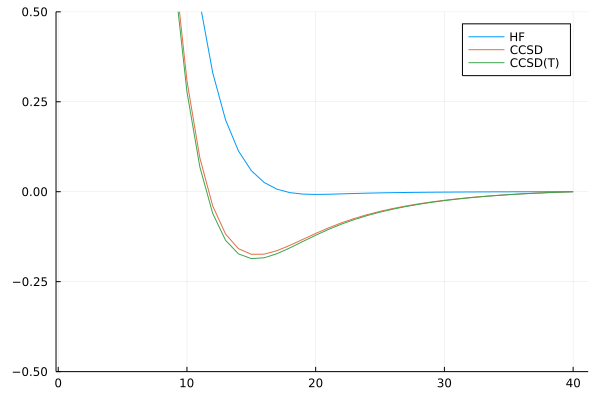

In [4]:
plot([energies_scf.-energies_scf[end], energies_ccsd.-energies_ccsd[end], energies_ccsdt.-energies_ccsdt[end]]*627.51, 
labels = ["HF" "CCSD" "CCSD(T)"])
ylims!((-.5,.5))